In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('laptops.csv')

In [16]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [17]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [18]:
data = df[['ram', 'storage', 'screen', 'final_price']]

In [19]:
data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [28]:
%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

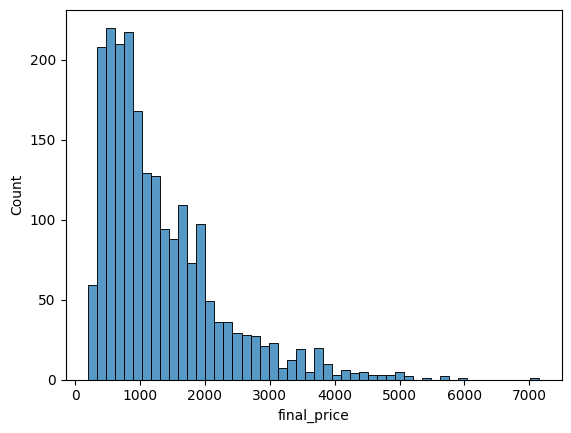

In [29]:
sns.histplot(data.final_price, bins=50)

# Question 1 & 2

In [227]:
data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [228]:
data.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


# Question 6

In [190]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [191]:
idx = np.arange(n)

In [192]:
np.random.seed(9)
np.random.shuffle(idx)

In [193]:
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]


In [200]:
type(data_train)

pandas.core.frame.DataFrame

In [201]:
data_train = pd.concat([data_train, data_val])

In [202]:
data_train.isna().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [207]:
data_train = data_train.fillna(0)

In [208]:
data_train.isna().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [211]:
y_train = data_train['final_price']

In [218]:
data_train = data_train.drop('final_price', axis = 1)

In [219]:
data_train

,ram,storage,screen
2003,32,1000,15.6
502,8,512,13.3
896,8,512,15.6
356,32,1000,17.3
499,16,1000,16.0
...,...,...,...
825,16,512,14.0
1512,16,512,13.3
270,8,256,15.6
2000,16,512,15.6


In [221]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [222]:
w0, w = train_linear_regression_reg(data_train, y_train, 0.001)

In [223]:
data_test = data_test.fillna(0)
y_test = data_test['final_price']
data_test = data_test.drop('final_price', axis = 1)

In [224]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [225]:
y_pred = w0 + data_test.dot(w)
rmse(y_test, y_pred)

608.6099822049573

# Question 3

In [232]:
np.random.seed(42)
np.random.shuffle(idx)

In [233]:
data_train = data.iloc[idx[:n_train]]
data_val = data.iloc[idx[n_train:n_train+n_val]]
data_test = data.iloc[idx[n_train+n_val:]]

In [237]:
data_train.count()

ram            1296
storage        1296
screen         1295
final_price    1296
dtype: int64

In [242]:
data_train_z = data_train.fillna(0)
data_train_m = data_train.fillna(round(data_train['screen'].mean(), 1))


In [244]:
y_train_z = data_train_z['final_price']
y_train_m = data_train_m['final_price']

data_train_z = data_train_z.drop('final_price', axis = 1)
data_train_m = data_train_m.drop('final_price', axis = 1)

In [245]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [246]:
data_val_z = data_val.fillna(0)
data_val_m = data_val.fillna(round(data_train['screen'].mean(), 1))

In [247]:
y_val_z = data_val_z['final_price']
y_val_m = data_val_m['final_price']

data_val_z = data_val_z.drop('final_price', axis = 1)
data_val_m = data_val_m.drop('final_price', axis = 1)

In [250]:
w0, w = train_linear_regression(data_train_z, y_train_z)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

539.51

In [251]:
y_pred = w0 + data_val_m.dot(w)

round(rmse(y_val_m, y_pred), 2)

539.64

# Question 4

In [252]:
w0, w = train_linear_regression_reg(data_train_z, y_train_z, 0)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

539.51

In [253]:
w0, w = train_linear_regression_reg(data_train_z, y_train_z, 0.01)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

539.51

In [254]:
w0, w = train_linear_regression_reg(data_train_z, y_train_z, 0.001)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

539.51

In [255]:
w0, w = train_linear_regression_reg(data_train_z, y_train_z, 1)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

539.73

In [256]:
w0, w = train_linear_regression_reg(data_train_z, y_train_z, 5)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

540.36

In [257]:
w0, w = train_linear_regression_reg(data_train_z, y_train_z, 10)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

540.83

In [258]:
w0, w = train_linear_regression_reg(data_train_z, y_train_z, 100)
y_pred = w0 + data_val_z.dot(w)

round(rmse(y_val_z, y_pred), 2)

542.07

# Question 5

In [340]:
rms_e = []

n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i)
    np.random.shuffle(idx)

    data_train = data.iloc[idx[:n_train]]
    data_val = data.iloc[idx[n_train:n_train+n_val]]
    data_test = data.iloc[idx[n_train+n_val:]]

    data_train = data_train.fillna(0)
    data_val = data_val.fillna(0)

    y_train = data_train['final_price']
    y_val = data_val['final_price']

    data_train = data_train.drop('final_price', axis = 1)
    data_val = data_val.drop('final_price', axis = 1)

    w0, w = train_linear_regression(data_train, y_train)
    y_pred = w0 + data_val.dot(w)

    rms_e.append(rmse(y_val, y_pred))


rms_e
round(np.std(rms_e), 3)

33.49